# Logistic Regression with non-linear features

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train          = np.genfromtxt(fname_data_train, delimiter=',')
data_test           = np.genfromtxt(fname_data_test, delimiter=',')

number_data_train   = data_train.shape[0]
number_data_test    = data_test.shape[0]

data_train_point    = data_train[:, 0:2]
data_train_point_x  = data_train_point[:, 0]
data_train_point_y  = data_train_point[:, 1]
data_train_label    = data_train[:, 2]

data_test_point     = data_test[:, 0:2]
data_test_point_x   = data_test_point[:, 0]
data_test_point_y   = data_test_point[:, 1]
data_test_label     = data_test[:, 2]

data_train_label_class_0    = (data_train_label == 0)
data_train_label_class_1    = (data_train_label == 1)

data_test_label_class_0     = (data_test_label == 0)
data_test_label_class_1     = (data_test_label == 1)

data_train_point_x_class_0  = data_train_point_x[data_train_label_class_0]
data_train_point_y_class_0  = data_train_point_y[data_train_label_class_0]

data_train_point_x_class_1  = data_train_point_x[data_train_label_class_1]
data_train_point_y_class_1  = data_train_point_y[data_train_label_class_1]

data_test_point_x_class_0   = data_test_point_x[data_test_label_class_0]
data_test_point_y_class_0   = data_test_point_y[data_test_label_class_0]

data_test_point_x_class_1   = data_test_point_x[data_test_label_class_1]
data_test_point_y_class_1   = data_test_point_y[data_test_label_class_1]

print('shape of point in train data = ', data_train_point.shape)
print('shape of point in test data = ', data_train_point.shape)

print('shape of label in train data = ', data_test_label.shape)
print('shape of label in test data = ', data_test_label.shape)

print('data type of point x in train data = ', data_train_point_x.dtype)
print('data type of point y in train data = ', data_train_point_y.dtype)

print('data type of point x in test data = ', data_test_point_x.dtype)
print('data type of point y in test data = ', data_test_point_y.dtype)


shape of point in train data =  (500, 2)
shape of point in test data =  (500, 2)
shape of label in train data =  (500,)
shape of label in test data =  (500,)
data type of point x in train data =  float64
data type of point y in train data =  float64
data type of point x in test data =  float64
data type of point y in test data =  float64


## plot the data

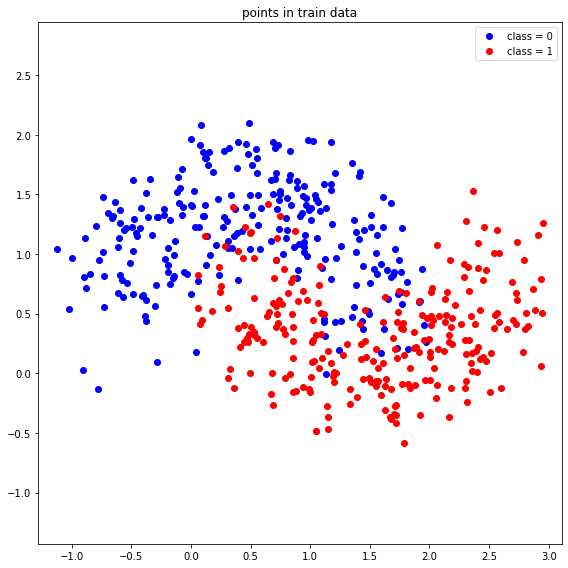

In [3]:
f = plt.figure(figsize=(8,8))   

plt.title('points in train data')
plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

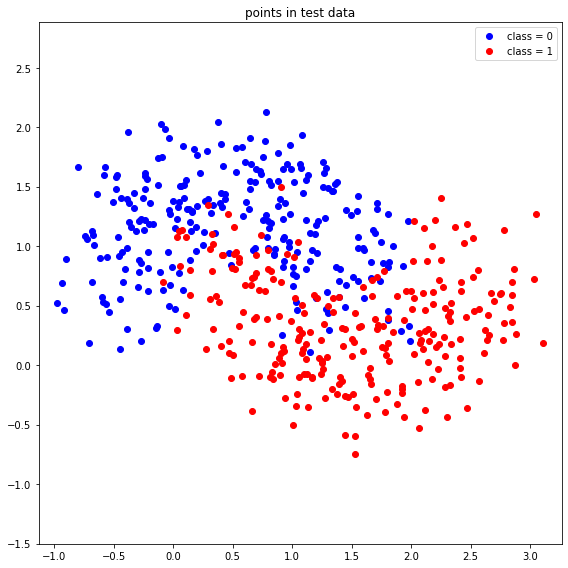

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in test data')
plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [39]:
def compute_feature(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    x = point[:,0]
    y = point[:,1]
    xx = point[:,0]
    yy = point[:,1]
    feature = [np.ones(len(point)), x, y, x*y, 1/(x+2), 1/(y+2), 1/(x+2)*(y+2),
               np.sin(x), np.cos(x), np.sin(y), np.cos(y), 
               np.sin(np.exp(x/2-1)), np.cos(np.exp(x/2-1)), np.sin(np.exp(y/2-1)), np.cos(np.exp(y/2-1)), 
               np.sin(np.log(x/2+1)), np.cos(np.log(x/2+1)), np.sin(np.log(y/2+1)), np.cos(np.log(y/2+1)), 
               np.exp(x/2-1), np.exp(y/2-1), np.log(x/2+1), np.log(y/2+1)]
    for i in range(1,7):
        xx = xx * x
        yy = yy * y
        feature.extend([xx, yy, xx*y, xx*y*y, 
                        np.sin(xx), np.cos(xx), np.sin(yy), np.cos(yy), 
                        np.sin(5*i*x), np.cos(5*i*x), np.sin(5*i*y), np.cos(5*i*y), 
                        np.sin(3*i*xx), np.cos(3*i*xx), np.sin(3*i*yy), np.cos(3*i*yy)])
    feature = np.array(feature)
    # feature = np.array([np.ones(len(point)), 
    #                     point[:,0], 
    #                     point[:,1], 
    #                     point[:,0]*point[:,0], 
    #                     point[:,1]*point[:,1], 
    #                     point[:,0]*point[:,1],
    #                     point[:,0]*point[:,0]*point[:,0], 
    #                     point[:,0]*point[:,0]*point[:,1], 
    #                     point[:,0]*point[:,1]*point[:,1],
    #                     point[:,1]*point[:,1]*point[:,1],
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,0], 
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,1], 
    #                     point[:,0]*point[:,0]*point[:,1]*point[:,1],
    #                     # point[:,0]*point[:,1]*point[:,1]*point[:,1],
    #                     # point[:,1]*point[:,1]*point[:,1]*point[:,1],
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,0], 
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,1], 
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,1]*point[:,1],
    #                     # point[:,0]*point[:,0]*point[:,1]*point[:,1]*point[:,1],
    #                     # point[:,0]*point[:,1]*point[:,1]*point[:,1]*point[:,1],
    #                     # point[:,1]*point[:,1]*point[:,1]*point[:,1]*point[:,1],
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,0], 
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,1], 
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,1]*point[:,1],
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,1]*point[:,1]*point[:,1],
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,0], 
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,1], 
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,1]*point[:,1],
    #                     point[:,0]*point[:,0]*point[:,0]*point[:,0]*point[:,1]*point[:,1]*point[:,1],
    #                     ])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [6]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = np.matmul(theta, feature)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [7]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = 1 / (1 + np.exp((-1) * z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [8]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = sigmoid(compute_linear_regression(theta, feature))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [9]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    residual = (-1)*label*np.log1p(compute_logistic_regression(theta, feature)) - (1-label)*np.log1p(1-compute_logistic_regression(theta, feature))
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [10]:
def compute_loss(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    loss = np.sum(compute_residual(theta, feature, label)) / len(feature) + np.inner(theta, theta) * alpha / 2

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [11]:
def compute_gradient(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    gradient = np.matmul((compute_logistic_regression(theta, feature) - label).T, feature.T) / len(feature) + alpha * theta

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [12]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    accuracy = np.sum(np.where(compute_logistic_regression(theta, feature)>=0.5,1,0) == label) / len(label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [102]:
number_iteration    = 100000 # you can change this value as you want 
learning_rate       = 0.0005 # you can change this value as you want 
number_feature      = 29 # you can change this value as you want
alpha               = 0.001 # you can change this value as you want

theta                       = np.zeros(number_feature)
loss_iteration_train        = np.zeros(number_iteration)
loss_iteration_test         = np.zeros(number_iteration)
accuracy_iteration_train    = np.zeros(number_iteration)
accuracy_iteration_test     = np.zeros(number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [103]:
for i in range(number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
 
    train_feature   = compute_feature(data_train_point)
    test_feature    = compute_feature(data_test_point)
    theta           = theta - learning_rate * compute_gradient(theta, train_feature, data_train_label, alpha)
    loss_train      = compute_loss(theta, train_feature, data_train_label, alpha)
    loss_test       = compute_loss(theta, test_feature, data_test_label, alpha)
    accuracy_train  = compute_accuracy(theta, train_feature, data_train_label)
    accuracy_test   = compute_accuracy(theta, test_feature, data_train_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    loss_iteration_train[i]     = loss_train
    loss_iteration_test[i]      = loss_test
    accuracy_iteration_train[i] = accuracy_train
    accuracy_iteration_test[i]  = accuracy_test

theta_optimal = theta

___

___

## functions for presenting the results

___

___

In [13]:
def function_result_01():

    print("final training accuracy = {:13.10f}".format(accuracy_iteration_train[-1]))

In [14]:
def function_result_02():

    print("final testing accuracy = {:13.10f}".format(accuracy_iteration_test[-1]))

In [15]:
def function_result_03():
    
    plt.figure(figsize=(8,6))
    plt.title('training loss')

    plt.plot(loss_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [16]:
def function_result_04():

    plt.figure(figsize=(8,6))
    plt.title('testing loss')

    plt.plot(loss_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [17]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('training accuracy')

    plt.plot(accuracy_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [18]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('testing accuracy')

    plt.plot(accuracy_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [19]:
def function_result_07():

    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    linreg = compute_linear_regression(theta_optimal, compute_feature(np.c_[XX.reshape(-1, 1), YY[::-1, :].reshape(-1, 1)])).reshape(XX.shape[0], XX.shape[1])
    vm = np.max([np.abs(np.max(linreg)), np.abs(np.min(linreg))])
    plt.imshow(linreg, cmap='RdBu_r', extent=[X[0], X[-1], Y[0], Y[-1]], vmin=-vm, vmax=vm)
    plt.colorbar()
    plt.contour(XX, YY[::-1, :], linreg, levels=0, colors=['black'])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [20]:
def function_result_08():
    
    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the testing data')
    
    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1)
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    linreg = compute_linear_regression(theta_optimal, compute_feature(np.c_[XX.reshape(-1, 1), YY[::-1, :].reshape(-1, 1)])).reshape(XX.shape[0], XX.shape[1])
    vm = np.max([np.abs(np.max(linreg)), np.abs(np.min(linreg))])
    plt.imshow(linreg, cmap='RdBu_r', extent=[X[0], X[-1], Y[0], Y[-1]], vmin=-vm, vmax=vm)
    plt.colorbar()
    plt.contour(XX, YY[::-1, :], linreg, levels=0, colors=['black'])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [21]:
def function_result_09():

    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    logreg = compute_logistic_regression(theta_optimal, compute_feature(np.c_[XX.reshape(-1, 1), YY[::-1, :].reshape(-1, 1)])).reshape(XX.shape[0], XX.shape[1])
    plt.imshow(logreg, cmap='RdBu_r', extent=[X[0], X[-1], Y[0], Y[-1]])
    plt.colorbar()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [22]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the testing data')

    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    logreg = compute_logistic_regression(theta_optimal, compute_feature(np.c_[XX.reshape(-1, 1), YY[::-1, :].reshape(-1, 1)])).reshape(XX.shape[0], XX.shape[1])
    plt.imshow(logreg, cmap='RdBu_r', extent=[X[0], X[-1], Y[0], Y[-1]])
    plt.colorbar()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final training accuracy =  0.9120000000
**************************************************
## [RESULT 02]
**************************************************
final testing accuracy =  0.8980000000
**************************************************
## [RESULT 03]
**************************************************


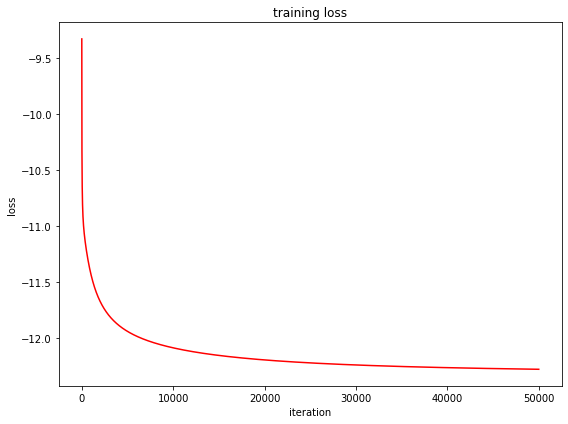

**************************************************
## [RESULT 04]
**************************************************


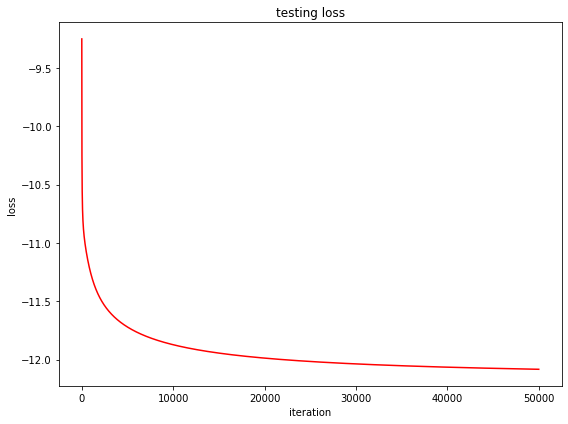

**************************************************
## [RESULT 05]
**************************************************


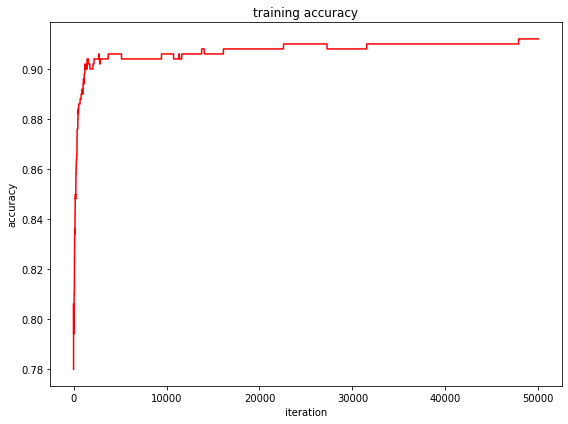

**************************************************
## [RESULT 06]
**************************************************


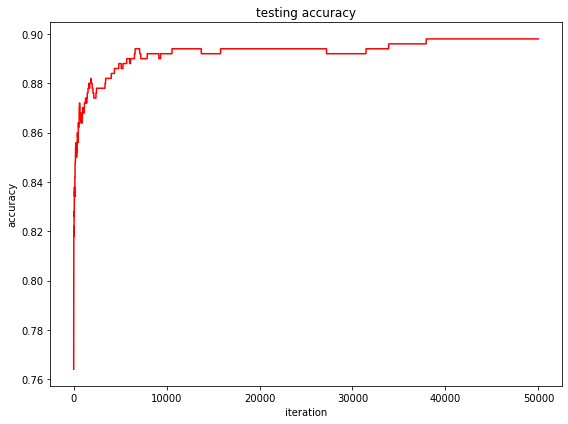

**************************************************
## [RESULT 07]
**************************************************


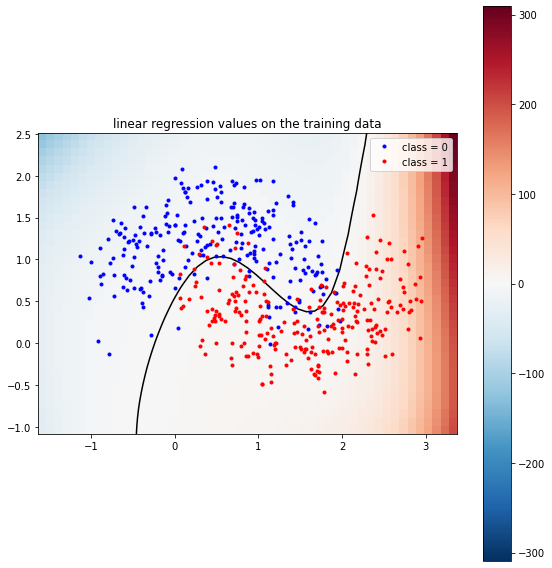

**************************************************
## [RESULT 08]
**************************************************


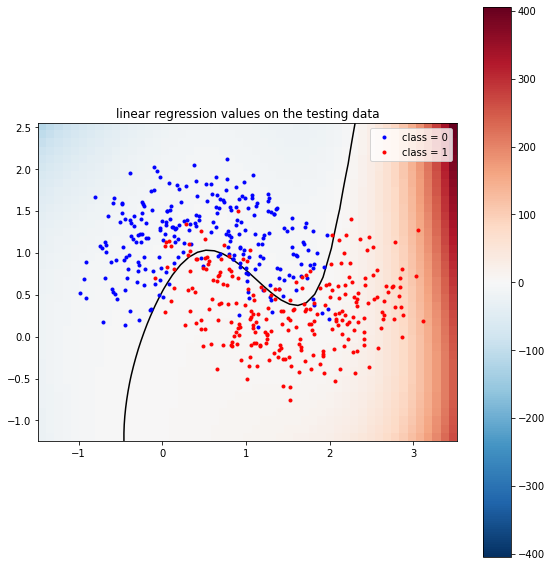

**************************************************
## [RESULT 09]
**************************************************


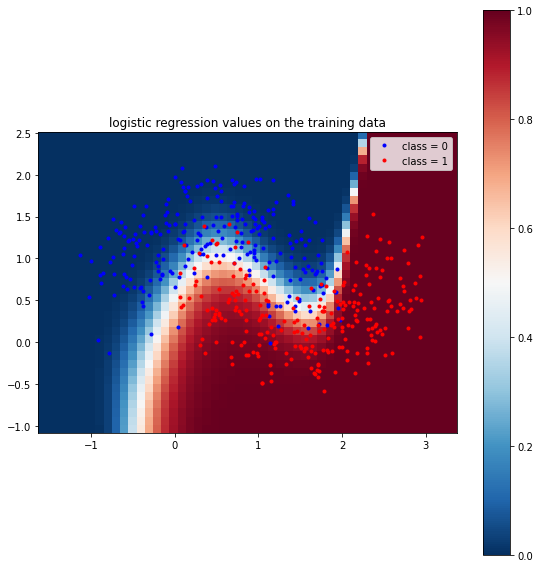

**************************************************
## [RESULT 10]
**************************************************


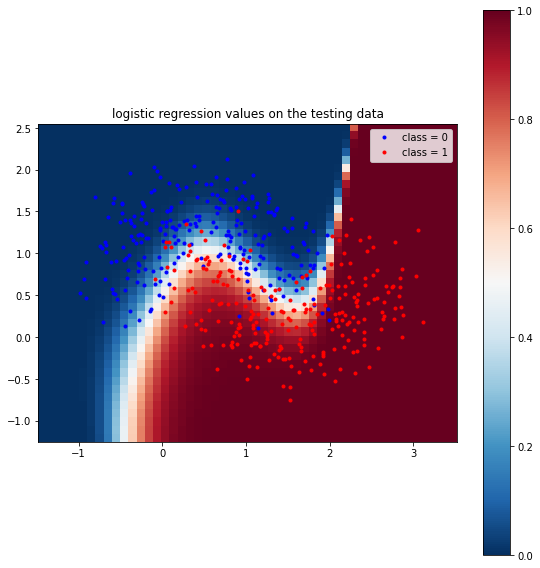

In [104]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)

In [28]:
def function_result_11():
    print("final training accuracy = {:13.10f}".format(accuracy_iteration_train[-1]))
    
def function_result_12():
    print("final testing accuracy = {:13.10f}".format(accuracy_iteration_test[-1]))
    
def function_result_13():
    plt.figure(figsize=(8,6))
    plt.title('loss')
    plt.plot(loss_iteration_train, '-', color='blue')
    plt.plot(loss_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.tight_layout()
    plt.show()
    
def function_result_14():
    plt.figure(figsize=(8,6))
    plt.title('accuracy')
    plt.plot(accuracy_iteration_train, '-', color='blue')
    plt.plot(accuracy_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.tight_layout()
    plt.show()
    
def function_result_15():
    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values')
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)
    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 
    [XX, YY] = np.meshgrid(X, Y)
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    linreg = compute_linear_regression(theta_optimal, compute_feature(np.c_[XX.reshape(-1, 1), YY[::-1, :].reshape(-1, 1)])).reshape(XX.shape[0], XX.shape[1])
    vm = np.max([np.abs(np.max(linreg)), np.abs(np.min(linreg))])
    plt.imshow(linreg, cmap='RdBu_r', extent=[X[0], X[-1], Y[0], Y[-1]], vmin=-vm, vmax=vm)
    plt.colorbar()
    plt.contour(XX, YY[::-1, :], linreg, levels=0, colors=['black'])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='purple', label='train class 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='orange', label='train class 1')
    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='test class 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='test class 1')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
number_iteration    = 100000 # you can change this value as you want 
learning_rate_list  = [0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03] # you can change this value as you want 
number_feature      = len(compute_feature(data_train_point)) # you can change this value as you want
alpha_list          = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1] # you can change this value as you want

for learning_rate in learning_rate_list:
    for alpha in alpha_list:
        print('lr =', learning_rate, '| alpha =', alpha)
        
        theta                       = np.zeros(number_feature)
        loss_iteration_train        = np.zeros(number_iteration)
        loss_iteration_test         = np.zeros(number_iteration)
        accuracy_iteration_train    = np.zeros(number_iteration)
        accuracy_iteration_test     = np.zeros(number_iteration)

        for i in range(number_iteration):
            
            # ++++++++++++++++++++++++++++++++++++++++++++++++++
            # complete the blanks
            #
        
            train_feature   = compute_feature(data_train_point)
            test_feature    = compute_feature(data_test_point)
            theta           = theta - learning_rate * compute_gradient(theta, train_feature, data_train_label, alpha)
            loss_train      = compute_loss(theta, train_feature, data_train_label, alpha)
            loss_test       = compute_loss(theta, test_feature, data_test_label, alpha)
            accuracy_train  = compute_accuracy(theta, train_feature, data_train_label)
            accuracy_test   = compute_accuracy(theta, test_feature, data_train_label)

            #
            # ++++++++++++++++++++++++++++++++++++++++++++++++++

            loss_iteration_train[i]     = loss_train
            loss_iteration_test[i]      = loss_test
            accuracy_iteration_train[i] = accuracy_train
            accuracy_iteration_test[i]  = accuracy_test

        theta_optimal = theta

        number_result = 15

        for i in range(10, number_result):
            title = '## [RESULT {:02d}]'.format(i+1)
            name_function = 'function_result_{:02d}()'.format(i+1)

            print('**************************************************')
            print(title)
            print('**************************************************')
            eval(name_function)